<a href="https://colab.research.google.com/github/elliot-linsey/QMUL/blob/main/Machine%20Learning/Coursework%203%20pt%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

## Q1:

The contextual attribute in a case of credit card fraud could be the specific persons transaction history. If the majority of purchases range from £10 to £1000, then suddenly a purchase of £10000 is made, this could be an instance of credit card fraud as it appears to be generated from a deviation from the normal. In this case, the contextual attribute is the specific persons transaction history because the outlier detection relies on the previous transactions that this person has made and for each new transaction to be compared to. The behavioural attribute is the cost of the purchase as this is being used to evaluate whether the purchase is an outlier in the context of the persons previous purchases. 

Another contextual attribute in credit card fraud could be location. If the majority of purchases using the card are made from London and then there is an unexplained purchase registered from Albania, this could be a deviation from the norm and be considered an outlier. In this case, the contextual attribute could be classed as the persons usual residence or location as this is where the majority of credit card uses are expected to be from. The behavioural attribute would be classed as transaction location as this is what you would be comparing to the contextual attribute, for instance, does a one off purchase from Albania match with this specific persons context of being UK based?  

## Q2:



In [170]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
data = data.replace('?',np.NaN)
data = data.dropna().reset_index(drop=True)
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [171]:
scaler = StandardScaler()
X1 = data.iloc[:,:-1].to_numpy()
X1 = scaler.fit_transform(X1)

In [172]:
pca = PCA(n_components=2)
projected1 = pca.fit_transform(X1)

projected1 = pd.DataFrame(projected1,columns=['pc1','pc2'])
projected1['class'] = data['Class']
projected1

,pc1,pc2,class
0,-1.470171,-0.104273,2
1,1.442046,-0.570141,2
2,-1.592478,-0.076120,2
3,1.479812,-0.528452,2
4,-1.344862,-0.090719,2
...,...,...,...
678,-1.723605,0.184232,2
679,-2.074148,0.231929,2
680,3.789261,-0.142209,4
681,2.240007,-1.091287,4


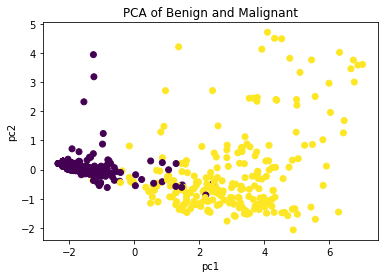

In [173]:
plt.scatter(projected1.pc1,projected1.pc2,c=projected1['class'])
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('PCA of Benign and Malignant')
plt.show()

In [174]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
import seaborn as sns
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(projected1)
distances, indices = nbrs.kneighbors(projected1.values)

# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1]

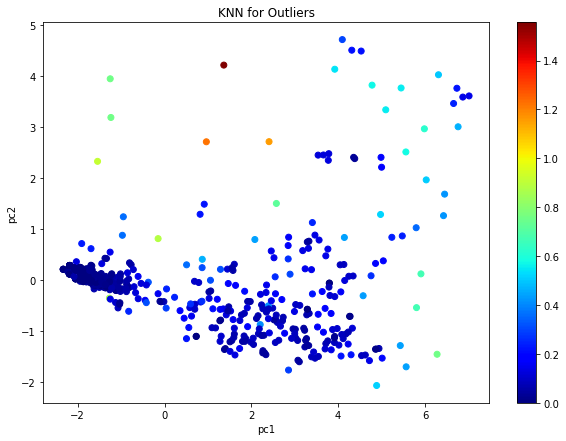

In [175]:
projected1['score'] = outlier_score
plt.figure(figsize=(10,7))
plt.scatter(x=projected1.pc1,y=projected1.pc2,c=projected1.score,cmap='jet')
plt.title('KNN for Outliers')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.colorbar()
plt.show()

In [176]:
projected1.nlargest(5,'score')

,pc1,pc2,class,score
63,1.366339,4.211204,4,1.556388
103,0.963989,2.707723,4,1.225128
270,2.408255,2.709960,4,1.160682
8,-1.542311,2.324003,2,0.913645
342,-0.147306,0.808885,4,0.884425


In [177]:
data.iloc[63]

Clump Thickness                10
Uniformity of Cell Size         4
Uniformity of Cell Shape        2
Marginal Adhesion               1
Single Epithelial Cell Size     3
Bare Nuclei                     2
Bland Chromatin                 4
Normal Nucleoli                 3
Mitoses                        10
Class                           4
Name: 63, dtype: object

In [178]:
projected1['location'] = projected1.apply(lambda row: np.array([row['pc1'],row['pc2']]),axis=1)
projected1

,pc1,pc2,class,score,location
0,-1.470171,-0.104273,2,8.778181e-15,"[-1.4701712405363956, -0.10427314905816248]"
1,1.442046,-0.570141,2,4.315989e-02,"[1.442046409821655, -0.5701414283777585]"
2,-1.592478,-0.076120,2,2.654234e-02,"[-1.592477691053607, -0.07611987003760576]"
3,1.479812,-0.528452,2,5.625157e-02,"[1.4798116752823125, -0.5284518096485148]"
4,-1.344862,-0.090719,2,4.163336e-17,"[-1.3448616872911923, -0.09071904712174998]"
...,...,...,...,...,...
678,-1.723605,0.184232,2,2.654234e-02,"[-1.723604862977942, 0.18423221110887084]"
679,-2.074148,0.231929,2,0.000000e+00,"[-2.0741476929955884, 0.2319286046516628]"
680,3.789261,-0.142209,4,7.865473e-02,"[3.7892607133648735, -0.14220878122754207]"
681,2.240007,-1.091287,4,5.157234e-02,"[2.2400069483839897, -1.0912867736350487]"


In [211]:
from scipy.spatial import distance as dist
class2 = projected1.location[projected1['class'] == 2]
class2_mean = np.mean(class2)
class4 = class2 = projected1.location[projected1['class'] == 4]
class4_mean = np.mean(class4)
projected1['distance'] = projected1.apply(lambda row: dist.euclidean(row['location'], class2_mean) if row['class'] == 2 else 
                                         dist.euclidean(row['location'], class4_mean),axis=1)
projected1

,pc1,pc2,class,score,location,distance
0,-1.470171,-0.104273,2,8.778181e-15,"[-1.4701712405363956, -0.10427314905816248]",0.226682
1,1.442046,-0.570141,2,4.315989e-02,"[1.442046409821655, -0.5701414283777585]",3.112174
2,-1.592478,-0.076120,2,2.654234e-02,"[-1.592477691053607, -0.07611987003760576]",0.156980
3,1.479812,-0.528452,2,5.625157e-02,"[1.4798116752823125, -0.5284518096485148]",3.140765
4,-1.344862,-0.090719,2,4.163336e-17,"[-1.3448616872911923, -0.09071904712174998]",0.308432
...,...,...,...,...,...,...
678,-1.723605,0.184232,2,2.654234e-02,"[-1.723604862977942, 0.18423221110887084]",0.160276
679,-2.074148,0.231929,2,0.000000e+00,"[-2.0741476929955884, 0.2319286046516628]",0.496439
680,3.789261,-0.142209,4,7.865473e-02,"[3.7892607133648735, -0.14220878122754207]",0.814436
681,2.240007,-1.091287,4,5.157234e-02,"[2.2400069483839897, -1.0912867736350487]",1.194360


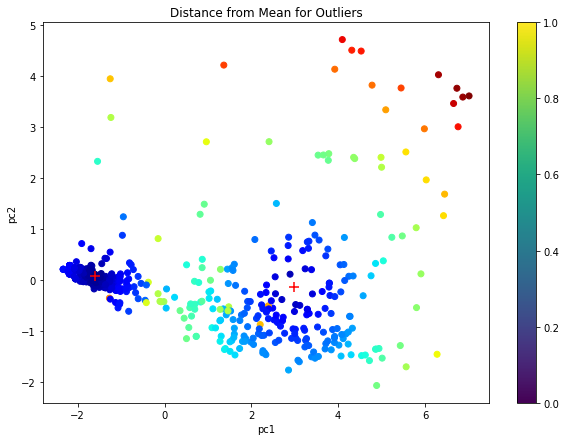

In [222]:
plt.figure(figsize=(10,7))
plt.scatter(x=projected1.pc1,y=projected1.pc2,c=projected1.distance,cmap='jet')
plt.scatter(class2_mean[0],class2_mean[1], marker='+',s=120,color='r')
plt.scatter(class4_mean[0],class4_mean[1], marker='+',s=120,color='r')
plt.title('Distance from Mean for Outliers')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.colorbar()
plt.show()

## Q4:

In [91]:
stocks = pd.read_csv('stocks.csv', header='infer') 
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)
stocks.head()

,MSFT,F,BAC
Date,,,
1/3/2007,29.860001,7.51,53.330002
1/4/2007,29.809999,7.70,53.669998
1/5/2007,29.639999,7.62,53.240002
1/8/2007,29.930000,7.73,53.450001
1/9/2007,29.959999,7.79,53.500000


In [92]:
N,d = stocks.shape
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)
delta.head()

,MSFT,F,BAC
Date,,,
1/4/2007,-0.167455,2.529960,0.637532
1/5/2007,-0.570278,-1.038961,-0.801185
1/8/2007,0.978411,1.443570,0.394438
1/9/2007,0.100231,0.776197,0.093543
1/10/2007,-1.001332,-0.770218,0.149536


In [93]:
X = delta.iloc[:,0:].to_numpy()
len(X)
X

array([[-0.16745478,  2.52996005,  0.63753232],
       [-0.57027845, -1.03896104, -0.80118505],
       [ 0.97841096,  1.44356955,  0.39443838],
       ...,
       [-0.45827592, -1.1299435 , -1.23839446],
       [-0.14287982, -0.16326531, -1.47783251],
       [-1.20827182, -0.81766149,  0.45454545]])

In [94]:
ee = OneClassSVM(nu=0.01,gamma='auto')
yhat = ee.fit_predict(X)
print(len(yhat))

2517


In [95]:
delta['y'] = yhat
delta.head()

,MSFT,F,BAC,y
Date,,,,
1/4/2007,-0.167455,2.529960,0.637532,1
1/5/2007,-0.570278,-1.038961,-0.801185,1
1/8/2007,0.978411,1.443570,0.394438,1
1/9/2007,0.100231,0.776197,0.093543,1
1/10/2007,-1.001332,-0.770218,0.149536,1


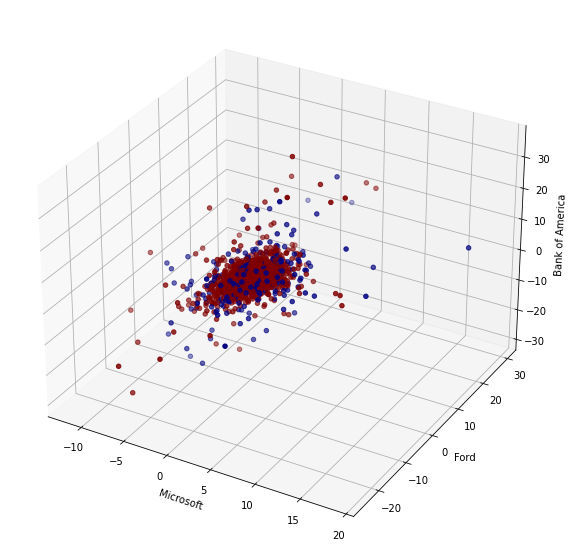

In [96]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC,c=delta.y,cmap='jet')
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
plt.show()

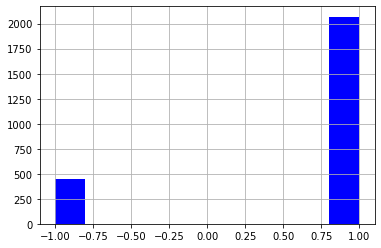

Percentage of points classed as outliers = 17.8%


In [97]:
delta['y'].hist(color='b')
plt.show()
len(delta[delta.y == -1])

print('Percentage of points classed as outliers = ' + str(round(len(delta[delta.y == -1])/len(delta)*100,1))+'%')

## Q5:

In [98]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = pd.read_csv(url, header=None)
df

scaler = StandardScaler()
Z = scaler.fit_transform(df)
# Extracting the values from the dataframe
#data = df.values

# Split dataset into input and output elements
X, y = Z[:, :-1], Z[:, -1]

# Summarize the shape of the dataset
print(X.shape, y.shape)


(506, 13) (506,)


In [99]:
pca = PCA(n_components=2)
projected = pca.fit_transform(X)

projected = pd.DataFrame(projected,columns=['pc1','pc2'])
projected

,pc1,pc2
0,-2.098297,0.773112
1,-1.457252,0.591985
2,-2.074598,0.599639
3,-2.611504,-0.006871
4,-2.458185,0.097712
...,...,...
501,-0.314968,0.724284
502,-0.110513,0.759308
503,-0.312360,1.155246
504,-0.270519,1.041362


In [100]:
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(projected)
distances, indices = nbrs.kneighbors(projected.values)

# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1]

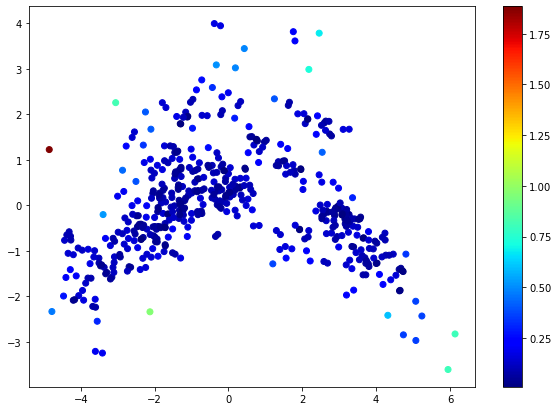

In [101]:
projected['score'] = outlier_score
plt.figure(figsize=(10,7))
plt.scatter(x=projected.pc1,y=projected.pc2,c=projected.score,cmap='jet')
plt.colorbar()
plt.show()